 <table style="width:100%;">
    <tr style="display:none">
        <td></td>
        <td></td>
    </tr>
    <tr style="height:3em">
        <td style="width:20%;align:left"><img src="iut_bordeaux.jpg"></td>
        <td style="width:60%;font: bold 2em 'Fira Sans', serif;text-align:center"> TP4 <br>Evaluation</td>
        <td style="width:20%;font: bold 1.3em 'Fira Sans', serif;vertical-align:top;">R01.06<br><i>1h30</i></td>
    </tr>
</table>

<div style="text-align:center">Sans document - Internet Interdit  <br> Vous rendrez ce fichier complété sur Moodle</div>



## Exercice 1 ( 4 points )

* Ecrire une fonction `implies` qui prend comme paramètre deux booléens et retourne le résultat de l'expression logique $a \implies b$.
* Ecrire une fonction `equiv` qui prend comme paramètre deux booléens et retourne le résultat de l'expression logique $a \iff b$.
* Ecrire une fonction $f$ qui prend en paramètre deux booléens et retourne le résultat de l'expression logique : $$(a \vee \overline b)\iff (a \wedge c)$$.
* Etablir, en la formatant correctement, la table de vérité de $f$.


In [1]:
def implies(a,b):
    return (not a) or b
print(implies(True,False))

def equiv(a,b):
    return implies(a,b) and implies(b,a)

def f(a,b,c):
    return equiv(a or (not b),a and c) 


def table():
    print("|{:^5} | {:^5} |{:^5} |{:^5} |".format("a","b","c","f"))
    for a in [True,False]: 
        for b in [True,False]: 
            for c in [True,False]: 
                r=f(a,b,c)
                print(f"|{a:^5} | {b:^5} |{c:^5} |{r:^5} |")

table()

False
|  a   |   b   |  c   |  f   |
|  1   |   1   |  1   |  1   |
|  1   |   1   |  0   |  0   |
|  1   |   0   |  1   |  1   |
|  1   |   0   |  0   |  0   |
|  0   |   1   |  1   |  1   |
|  0   |   1   |  0   |  1   |
|  0   |   0   |  1   |  0   |
|  0   |   0   |  0   |  0   |


#### Exercice 2

Écrire une fonction `premier` qui prend comme paramètre un nombre entier naturel et retourne un booléen. 

Cette fonction retournera `True` si le nombre passé en paramètre est premier et `False`sinon.

On prendra soin d'optimiser son code (critère d'arrêt) en indiquant les choix faits en commentaire.



In [8]:
from math import sqrt


def premier(p):
    if p==0 or p==1:
        return False
    elif p==2 or p==3:
           return True
    else:
        maxi = int(sqrt(p))+1
 
        for k in range(2,maxi):
            if p%k==0:
                return False
            
        return True
    

assert premier(0)==False, "0 n'est pas premier"
assert premier(1)==False, "1 n'est pas premier"
assert  premier(5)==True, "2 est premier"
assert premier(12)==False, "12 n'est pas premier"


AssertionError: 12 n'est pas premier

#### Exercice 3

Ecrire une fonction qui renvoie le plus petit entier tel que $n^2+10n+41$ soit plus grand que 10000.


In [3]:
def seuil():
    n=1
    while n**2+10*n+41.8 <10000:
        n+=1
    return n

a=seuil()
print(a)
print(a**2+a*10+41.8)

95
10016.8


## Exercice  ( points)

Le but de cet exercice est de créer une fonction qui prend comme paramètre une liste de nombres entiers naturels et qui affiche en sortie une liste des indices où se trouvent le maximum de la liste donnée en entrée.(sans utiliser de fonction `max`)

Par exemple : 

si `liste=[1, 10, 5, 10, 1, 6, 1, 2, 1, 10, 9, 1, 4]` 

alors comme le maximum est 10, la liste des indices où on trouve 10 est `[1,3,9]`.



In [12]:
def maxilist(L):
    Liste=[]
    maxi=0
    for i in range(len(L)):
        if L[i]>maxi:
            maxi=L[i]
            Liste=[i]
        elif L[i]==maxi:
            Liste.append(i)
    return Liste
        
l=[1, 10, 5, 10, 1, 6, 1, 2, 1, 10, 9, 1, 4]
l1=[10, 10, 5, 10, 11, 6, 11, 2, 1, 10, 9, 1, 10]
print()
assert maxilist(l)==[1,3,9], "la liste des indices est incorrecte"

assert maxilist(l1)==[4,6], "la liste des indices est incorrecte"
            

## Exercice  (5 points)

Un nombre triangulaire est un nombre qui est la somme des entiers de 1 jusqu'à un certain nombre. Par exemple, le septième nombre triangulaire est 1 + 2 + 3 + 4 + 5 + 6 + 7 = 28.

Les 10 premiers nombres triangulaires sont : 1, 3, 6, 10, 15, 21, 28, 36, 45, 55.

Listons les diviseurs des sept premiers nombres triangulaires :

 1: 1  

 3: 1,3  

 6: 1,2,3,6  

10: 1,2,5,10  

15: 1,3,5,15  

21: 1,3,7,21  

28: 1,2,4,7,14,28  

On peut remarquer que 28 est le premier nombre triangulaire qui a plus de 5 diviseurs.

1. Quel est le premier nombre triangulaire qui possède plus de 100 diviseurs ?
2. Tracer un graphique avec en abscisse les nombres triangulaires et en ordonnée le nombre de diviseur correspondant.


15
6
73920 112


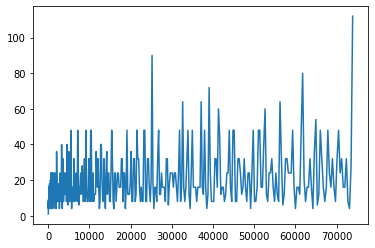

In [15]:
import matplotlib.pyplot as plt

def triangulaire(n):
    return sum([i for i in range (1,n+1)])

print(triangulaire(5))

def nb_diviseur(n): # non optimisé
    L=[]
    for i in range (1,n+1):
        if n%i==0:
            L.append(i)
    return len(L)
            
print(nb_diviseur(28))     

ab=[]
ordo=[]

n=1
find=False
while  not find:
    nb=triangulaire(n)
    ab.append(nb)
   
    a=nb_diviseur(nb)
    ordo.append(a)
    if a>100:
        find=True
    n+=1
    #print(f"n={n} nb={nb} nb_diviseur={a}")
    
print(nb,nb_diviseur(nb))

plt.plot(ab,ordo)


assert triangulaire(1)==1
assert triangulaire(2)==3
assert triangulaire(5)==15

assert nb_diviseur(1)==1         
assert nb_diviseur(28)==6
